In [1]:
import os

model_errors=dict()

# !pip install --upgrade Cython
# !pip install --upgrade git+https://github.com/statsmodels/statsmodels
# !pip install pmdarima

repo_url = 'https://github.com/kaustav1996/utility_data_analysis'

%cd /content

repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

!git clone {repo_url}
%cd {repo_dir_path}
!git pull

%ls

csv_file= os.path.abspath(os.path.join(repo_dir_path,'interval_data.csv'))

Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (0.29.10)
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-dx53tjha
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-dx53tjha
  Stored in directory: /tmp/pip-ephem-wheel-cache-p4r7ptdz/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.9.0
    Uninstalling statsmodels-0.9.0:
      Successfully uninstalled statsmodels-0.9.0
     |████████████████████████████████| 921kB 43.5MB/s 
/content
Cloning into 'utility_data_analysis'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 41 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (41/41), done.
/content/utility_data_analysis
Already up to date.
analysis_on_csv_data.ipynb          inte

In [106]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#Importing data
df = pd.read_csv(csv_file)
df=df.fillna(df.mean())
#Printing head
df.head()


,TIME,KW
0,8/29/2018 0:15,0.64
1,8/29/2018 0:30,0.74
2,8/29/2018 0:45,1.10
3,8/29/2018 1:00,0.92
4,8/29/2018 1:15,0.92


In [107]:
df.tail()

,TIME,KW
16395,5/29/2019 21:00,0.67
16396,5/29/2019 21:15,0.67
16397,5/29/2019 21:30,0.67
16398,5/29/2019 21:45,0.67
16399,5/29/2019 22:00,0.67


In [108]:
train=df[16271:16327]
test=test=df[16327:]

df.Timestamp = pd.to_datetime(df['TIME'],format='%m/%d/%Y %H:%M') 
df.index = df.Timestamp 
df = df.resample('60T').mean()
train.Timestamp = pd.to_datetime(train['TIME'],format='%m/%d/%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('60T').mean()
test.Timestamp = pd.to_datetime(test['TIME'],format='%m/%d/%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('60T').mean()

# train['TIME']=train.index

print(train)

                           KW
TIME                         
2019-05-28 00:00:00  3.517500
2019-05-28 01:00:00  3.820000
2019-05-28 02:00:00  1.320000
2019-05-28 03:00:00  0.960000
2019-05-28 04:00:00  1.320000
2019-05-28 05:00:00       NaN
2019-05-28 06:00:00  1.080000
2019-05-28 07:00:00  0.810000
2019-05-28 08:00:00  1.380000
2019-05-28 09:00:00  1.230000
2019-05-28 10:00:00  1.440000
2019-05-28 11:00:00       NaN
2019-05-28 12:00:00       NaN
2019-05-28 13:00:00       NaN
2019-05-28 14:00:00       NaN
2019-05-28 15:00:00       NaN
2019-05-28 16:00:00  0.760000
2019-05-28 17:00:00  0.990000
2019-05-28 18:00:00  0.930000
2019-05-28 19:00:00  0.930000
2019-05-28 20:00:00  1.080000
2019-05-28 21:00:00       NaN
2019-05-28 22:00:00  2.163333
2019-05-28 23:00:00  5.140000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


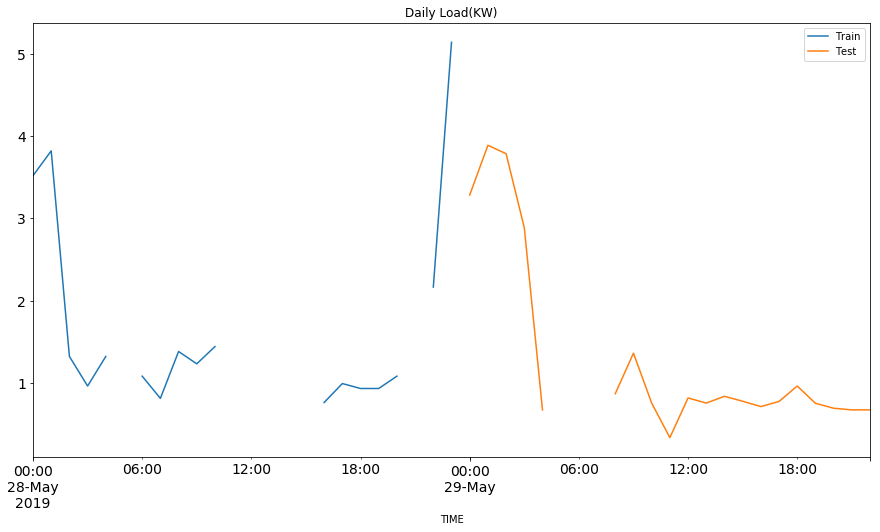

In [109]:
train.KW.plot(figsize=(15,8), title= 'Daily Load(KW)',label='Train' ,fontsize=14)
test.KW.plot(figsize=(15,8), title= 'Daily Load(KW)', label='Test', fontsize=14)
plt.legend(loc='best')
plt.show()

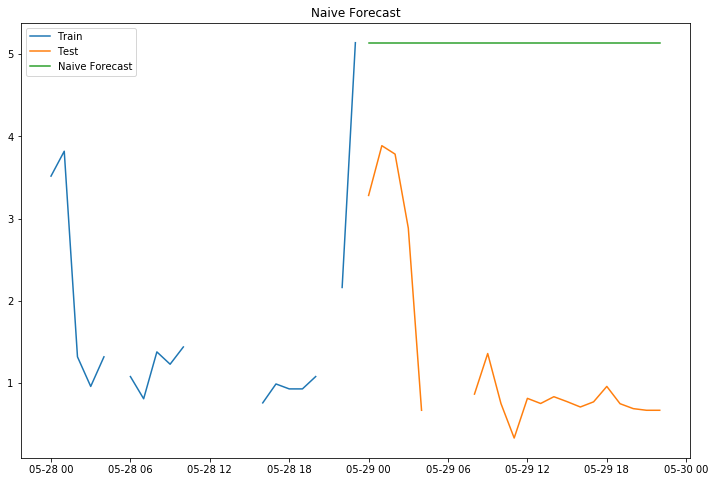

In [110]:
dd= np.asarray(train.KW)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['KW'], label='Train')
plt.plot(test.index,test['KW'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [111]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test = test.fillna(test.mean())
rms = sqrt(mean_squared_error(test.KW, y_hat.naive))
print(rms)

model_errors['Naive']=rms

3.964876218247749


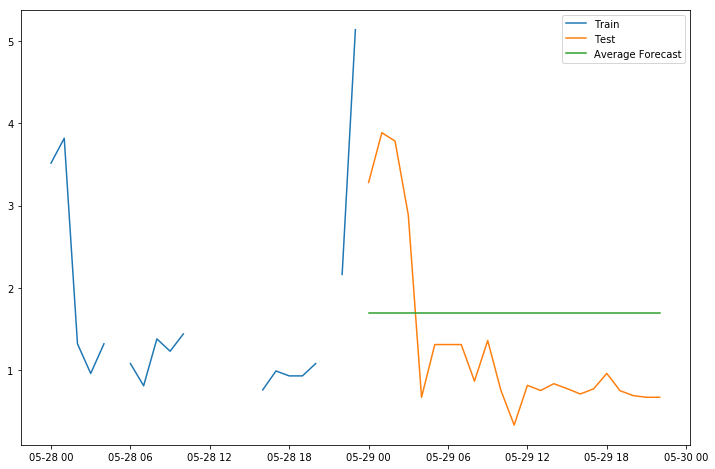

In [112]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['KW'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [113]:
rms = sqrt(mean_squared_error(test.KW, y_hat_avg.avg_forecast))
print(rms)

model_errors['Average']=rms

1.099802339043448


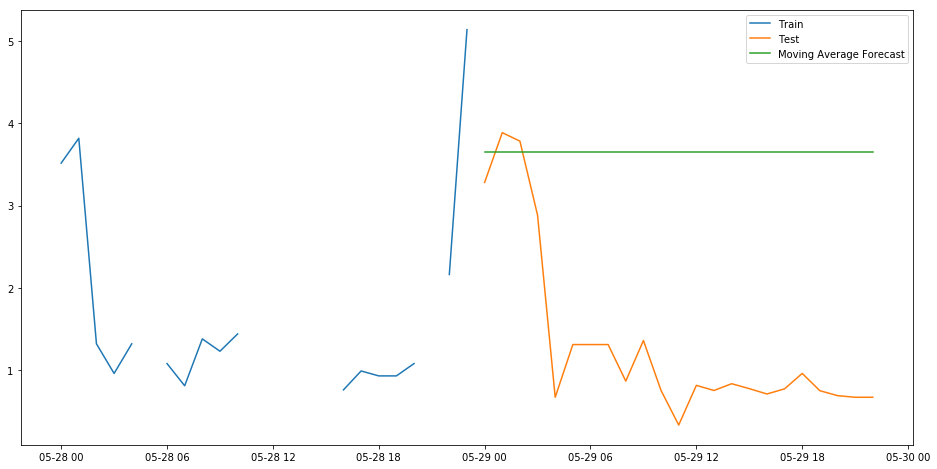

In [114]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['KW'].rolling(2).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [115]:
test = test.fillna(test.mean())
rms = sqrt(mean_squared_error(test.KW, y_hat_avg.moving_avg_forecast))
print(rms)

model_errors['Moving Average']=rms

2.5569456243781508


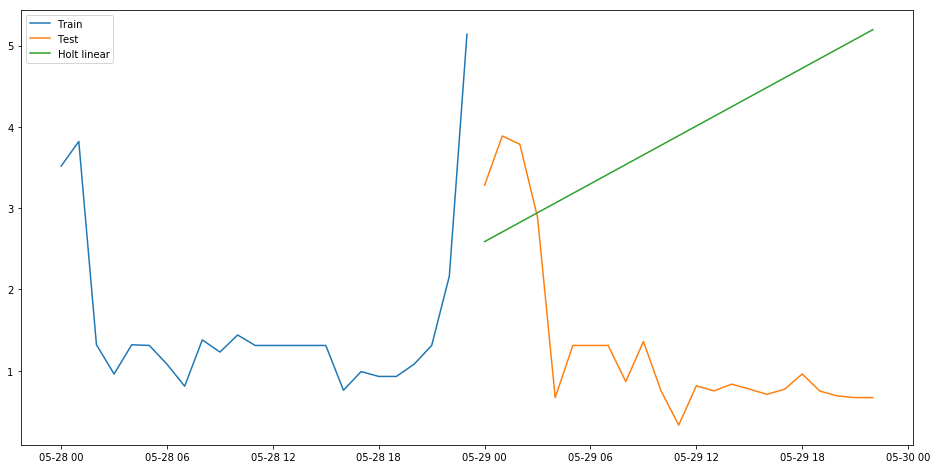

In [120]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

train = train.fillna(test.mean())

y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['KW'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt linear')
plt.legend(loc='best')
plt.show()

In [121]:

rms = sqrt(mean_squared_error(test.KW, y_hat_avg.Holt_linear))
print(rms)

model_errors['Holt Linear']=rms

3.083083342200854


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:710: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


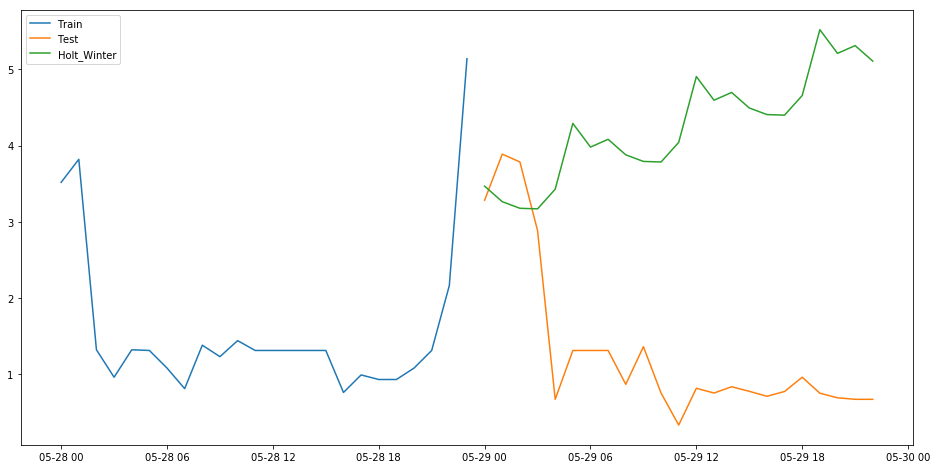

In [122]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['KW']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [123]:
rms = sqrt(mean_squared_error(test.KW, y_hat_avg.Holt_Winter))
print(rms)

3.3316074385682963


In [125]:
import pmdarima as pm
import datetime

# train_df = train.copy()

# format = '%Y-%m-%d %H:%M'

# for i in range(len(train_df)):
#     train_df['TIME'][i]=(train_df['TIME'][i] - datetime.datetime(2000,1,1)).total_seconds()


arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      seasonal=False)

Fit ARIMA: order=(2, 0, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0); AIC=73.985, BIC=76.341, Fit time=0.002 seconds
Fit ARIMA: order=(1, 0, 0); AIC=66.540, BIC=70.074, Fit time=0.179 seconds
Fit ARIMA: order=(0, 0, 1); AIC=65.783, BIC=69.317, Fit time=0.018 seconds
Fit ARIMA: order=(1, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 2); AIC=67.094, BIC=71.806, Fit time=0.032 seconds
Fit ARIMA: order=(1, 0, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.296 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


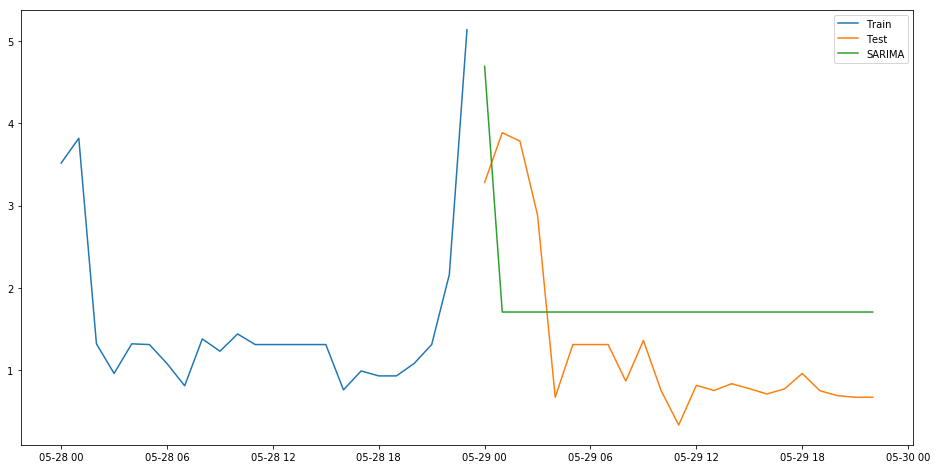

In [126]:
predicted_val=arima.predict(n_periods=test.shape[0])
predicted_df = test.copy()


for i in range(len(predicted_df)):
    predicted_df['KW'][i]=predicted_val[i]


plt.figure(figsize=(16,8))
plt.plot( train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(predicted_df, label='SARIMA')
plt.legend(loc='best')
plt.show()

In [127]:
rms = sqrt(mean_squared_error(test.KW, predicted_df.KW))
print(rms)

model_errors['SARIMA']=rms

1.0931117444905114


In [128]:
for index in model_errors:
    print(index+' : '+str(model_errors[index]))

Naive : 3.964876218247749
Average : 1.099802339043448
Moving Average : 2.5569456243781508
Holt Linear : 3.083083342200854
SARIMA : 1.0931117444905114
